In [21]:
set.seed(1)
train <- read.csv("C:/Users/HP/Downloads/mnist_train.psv", sep="|", as.is=TRUE, header=FALSE)
test <- read.csv("C:/Users/HP/Downloads/mnist_test.psv", sep="|", as.is=TRUE, header=FALSE)

In [22]:
dim(train)

[1] 7291  257

In [23]:
train[1:10,1:10]

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
6,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-0.631,0.862
5,-1,-1,-1,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853
4,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
7,-1,-1,-1,-1.000,-1.000,-0.273,0.684,0.960,0.450
3,-1,-1,-1,-1.000,-1.000,-0.928,-0.204,0.751,0.466
6,-1,-1,-1,-1.000,-1.000,-0.397,0.983,-0.535,-1.000
3,-1,-1,-1,-0.830,0.442,1.000,1.000,0.479,-0.328
1,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,0.510,-0.213
0,-1,-1,-1,-1.000,-1.000,-0.454,0.879,-0.745,-1.000
1,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-0.909,0.801


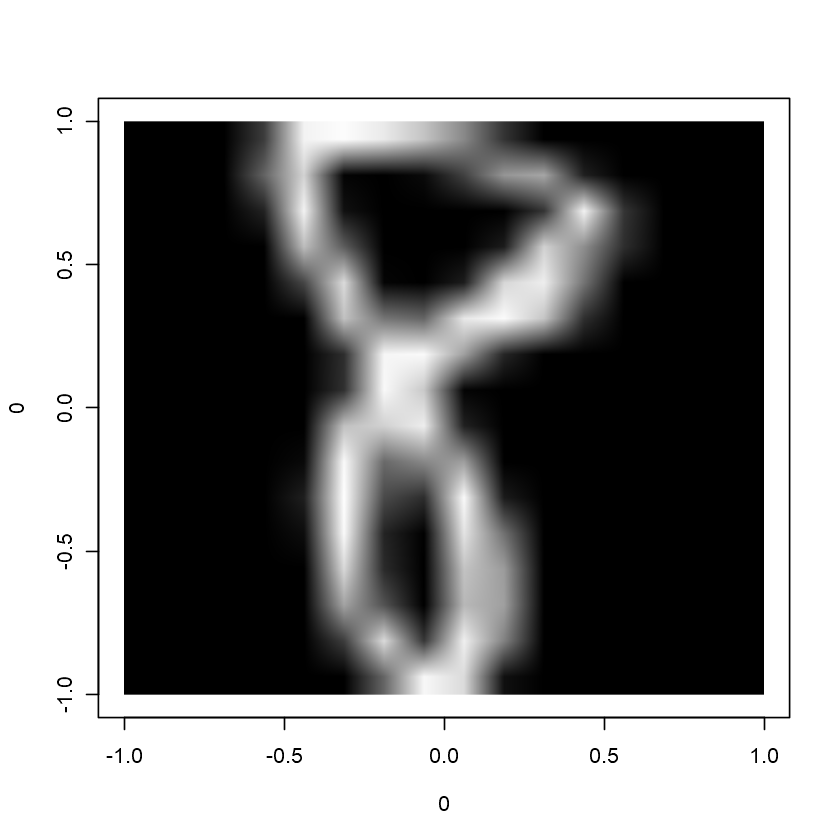

In [26]:
y <- matrix(as.matrix(train[3400,-1]),16,16,byrow=TRUE)
#y
y <- (y + 1)*0.5

plot(0,0)
rasterImage(y,-1,-1,1,1)

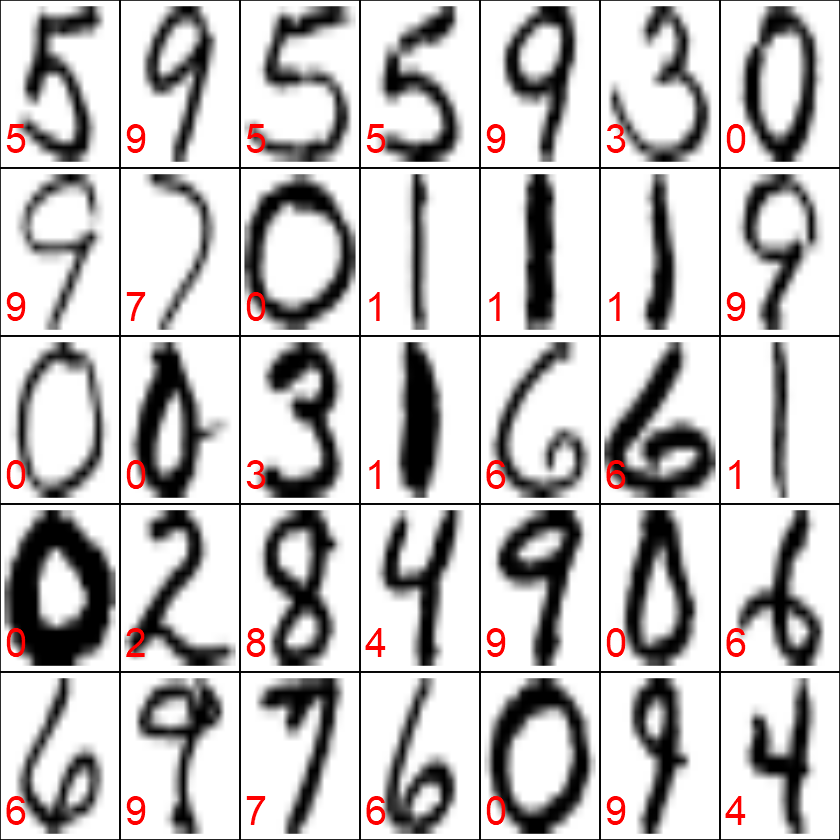

In [27]:
iset <- sample(1:nrow(train),5*7)
par(mar=c(0,0,0,0))
par(mfrow=c(5,7))
for (j in iset) {
  y <- matrix(as.matrix(train[j,-1]),16,16,byrow=TRUE)
  y <- 1 - (y + 1)*0.5

  plot(0,0,xlab="",ylab="",axes=FALSE)
  rasterImage(y,-1,-1,1,1)
  box()
  text(-0.8,-0.7, train[j,1], cex=3, col="red")
}

In [28]:
Xtrain <- as.matrix(train[,-1])
Xtest <- as.matrix(test[,-1])
ytrain <- train[,1]
ytest <- test[,1]

In [32]:
library(FNN)
predKnn <- knn(Xtrain,Xtest,ytrain,k=3)

Warning message:
"package 'FNN' was built under R version 3.5.2"

In [31]:
#install.packages("FNN")

Installing package into 'C:/Users/HP/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'FNN' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\Rtmp6FvAdE\downloaded_packages


In [34]:
ytest

[1] 9 6 3 6 6 0 0 0 6 9 6 2 2 4 0 3 1 6 9 6 2 2 4 9 6 2 0 3 8 3 7 0 5 0 7 9 5
  [38] 0 0 7 0 8 1 0 7 1 0 4 2 0 8 5 1 2 0 6 5 9 2 0 9 0 4 2 0 9 1 2 2 1 8 3 7 2
  [75] 0 9 0 1 2 1 2 0 7 2 0 6 7 8 2 0 9 0 4 8 2 0 7 0 0 9 0 6 7 3 0 7 2 8 9 4 3
 [112] 3 9 9 7 0 5 9 9 6 8 5 3 0 6 8 5 6 1 4 8 5 0 1 6 9 0 0 7 7 9 6 6 3 3 2 7 5
 [149] 0 9 6 2 2 4 8 9 1 0 1 0 2 9 0 6 0 2 9 0 3 3 4 0 9 0 4 0 8 6 0 4 1 0 6 0 4
 [186] 0 6 4 1 4 1 0 1 0 4 5 7 2 8 6 3 1 8 0 5 0 1 8 0 0 1 3 8 0 2 0 6 8 0 9 0 9
 [223] 8 0 3 2 1 8 0 3 2 2 4 1 2 9 6 4 1 5 2 5 5 1 6 4 5 5 1 0 1 8 4 9 8 4 6 0 4
 [260] 8 4 7 7 0 8 4 0 9 2 8 4 6 0 1 2 3 6 6 6 2 3 2 0 6 6 8 2 0 1 7 9 9 7 3 7 9
 [297] 9 6 6 7 9 9 7 9 9 7 5 6 8 2 7 5 6 8 1 0 1 1 1 6 7 6 8 5 0 9 4 8 1 8 6 8 5
 [334] 0 8 9 0 0 6 7 4 1 3 1 6 4 1 4 1 8 0 5 2 4 1 0 0 0 1 1 0 0 1 8 1 0 0 0 7 1
 [371] 0 0 1 7 1 0 0 2 0 1 3 9 3 1 0 1 0 8 1 0 1 0 1 1 0 0 0 1 1 0 1 6 3 1 0 0 2
 [408] 2 1 0 0 2 1 1 0 0 3 4 1 0 0 1 0 1 0 0 0 3 1 0 0 3 6 8 9 1 1 5 8 9 1 0 8 8
 [445] 0 3 0 2 5 7 1 1 7 0 2 8 8 7 0 4 9 5 0 2 8 8 9 9 6 7 2 0 9 7 2 0 8 9 7 0 7
 [482] 5 9 7 3 0 1 9 6 5 2 4 0 0 0 4 4 2 2 2 3 4 0 1 6 0 4 2 7 2 8 4 0 1 1 7 8 1
 [519] 5 0 3 8 0 9 1 6 8 0 2 0 6 9 8 4 1 1 9 4 0 8 7 9 4 6 1 8 9 4 2 4 0 0 0 0 0
 [556] 7 5 2 3 1 7 5 0 0 6 4 3 0 6 8 4 8 1 7 0 4 3 6 1 3 4 3 8 1 2 1 4 2 6 6 9 6
 [593] 8 1 3 9 0 0 2 5 3 5 0 4 5 1 4 2 1 9 3 5 0 5 6 0 4 8 8 1 9 7 1 2 2 3 2 3 1
 [630] 2 3 2 6 0 2 3 2 6 0 2 5 6 6 1 2 0 2 3 9 0 5 0 1 2 0 0 3 7 2 0 0 0 5 2 1 0
 [667] 2 2 0 0 0 5 2 0 0 1 3 2 0 4 6 0 2 0 0 1 6 7 9 9 6 6 2 0 0 0 1 4 6 1 5 1 4
 [704] 6 2 6 8 4 6 9 7 0 4 6 2 8 3 8 3 0 3 4 6 4 1 0 8 1 4 6 3 8 3 4 6 2 9 1 0 0
 [741] 1 0 1 4 0 1 4 4 6 0 5 2 4 6 2 7 8 4 6 1 4 0 4 7 8 1 1 1 1 2 9 4 6 9 2 3 4
 [778] 6 3 6 8 4 7 4 0 1 4 6 3 8 3 3 3 5 7 5 3 3 5 4 2 3 3 9 5 2 3 3 5 4 8 4 4 9
 [815] 4 2 2 0 7 0 6 4 6 3 8 3 4 3 2 3 2 2 7 6 0 4 0 8 9 0 2 9 6 6 0 4 4 6 2 9 1
 [852] 9 6 2 3 0 9 2 1 0 5 9 0 0 2 7 4 8 0 9 8 3 3 0 6 9 7 9 4 9 5 3 8 1 3 8 9 0
 [889] 2 1 0 2 8 4 0 3 1 6 8 8 1 8 7 1 8 4 5 2 7 3 6 4 4 7 2 0 9 8 5 0 2 9 6 8 2
 [926] 1 9 6 2 2 4 9 6 7 8 2 9 6 8 9 6 8 1 3 9 6 8 1 9 0 0 4 5 7 7 0 9 8 3 0 3 5
 [963] 8 2 0 5 8 3 8 1 4 6 8 8 4 8 6 8 1 2 8 6 8 0 0 9 6 8 1 4 4 2 3 5 0 9 9 3 3
[1000] 6 9 8 0 4 6 8 0 2 0 6 5 5 1 0 1 8 9 1 0 1 0 3 7 5 5 9 9 9 8 0 3 7 5 5 0 3
[1037] 4 5 8 0 5 4 0 1 0 5 7 5 3 0 5 4 4 6 0 5 8 5 3 0 5 4 0 2 0 5 0 9 1 3 7 3 9
[1074] 7 3 7 3 1 1 3 7 8 1 6 0 0 4 0 3 7 1 3 8 3 7 9 0 2 2 4 0 0 0 0 3 7 8 7 3 7
[1111] 2 0 2 7 2 2 0 4 7 0 1 4 8 9 0 0 2 5 0 8 0 8 7 5 4 5 9 7 0 3 8 9 7 3 0 2 9
[1148] 4 1 1 1 9 4 1 0 7 6 9 1 6 0 6 8 0 0 9 6 8 0 0 9 6 8 1 2 7 7 1 1 3 0 5 7 1
[1185] 0 5 5 7 1 0 2 9 9 7 0 9 5 8 7 0 1 7 3 1 5 9 7 4 0 0 2 9 6 7 1 2 9 6 7 1 3
[1222] 9 6 7 3 4 9 6 8 1 6 6 6 4 4 1 7 3 5 7 6 7 2 3 0 8 7 1 0 4 8 2 1 2 9 1 9 4
[1259] 8 7 5 3 4 9 6 4 8 1 4 1 4 8 0 8 0 4 8 4 3 3 4 8 7 6 8 4 8 2 0 7 4 7 0 0 6
[1296] 4 8 2 4 0 0 5 9 5 4 2 3 0 1 4 8 6 5 5 1 4 2 2 7 4 4 2 5 4 4 4 2 0 3 4 4 1
[1333] 3 6 1 4 1 9 9 2 0 8 7 4 4 4 3 2 2 1 4 4 0 7 7 4 5 3 8 4 4 4 7 1 1 4 4 2 3
[1370] 0 4 4 2 5 8 4 5 5 0 4 4 2 0 9 5 4 4 0 1 5 3 5 3 8 5 4 4 0 9 5 3 4 0 2 0 3
[1407] 0 5 4 1 4 1 0 3 0 4 8 4 1 9 6 7 2 0 3 3 0 6 8 3 3 3 0 2 3 3 3 3 9 1 4 1 3
[1444] 0 5 5 1 8 2 5 0 3 6 9 0 0 0 5 5 0 3 4 0 6 4 1 3 3 6 4 1 1 2 6 4 1 4 1 6 6
[1481] 1 0 2 6 4 1 1 1 6 6 2 1 5 6 6 0 4 3 6 7 0 3 9 8 4 1 2 1 8 2 6 0 1 4 9 6 8
[1518] 5 7 1 4 6 3 7 1 0 3 7 7 1 4 4 9 7 1 1 0 5 7 1 1 1 2 9 9 8 1 1 0 2 8 6 0 0
[1555] 2 8 8 7 0 3 3 0 1 0 3 3 0 1 0 2 9 0 6 0 2 8 4 0 0 2 9 0 1 2 9 4 0 5 2 9 0
[1592] 6 7 2 9 8 0 1 2 9 5 5 0 2 9 9 0 5 5 5 1 0 1 2 9 2 0 1 8 0 3 2 2 7 0 1 2 4
[1629] 4 3 1 0 6 4 1 1 6 1 1 7 6 0 5 7 1 8 8 6 0 0 1 5 8 7 0 1 5 9 9 1 1 5 7 5 5
[1666] 7 2 1 2 5 7 0 6 8 8 3 2 7 4 9 9 5 1 6 9 9 5 0 5 7 2 0 0 9 5 3 6 2 7 2 2 0
[1703] 3 2 4 2 3 7 2 3 5 5 7 2 7 1 2 7 2 3 1 5 3 9 3 0 5 3 8 8 0 3 1 4 1 3 7 1 9
[1740] 1 4 1 1 9 1 2 9 1 9 2 5 5 1 9 1 7 0 1 4 1 0 1 1 9 1 5 4 8 5 7 2 6 8 0 3 2
[1777] 2 6 4 1 4 1 8 6 6 3 5 9 7 2 0 2 9 9 2 9 9 7 2 2 5 1 0 0 4 6 7 0 1 3 0 8 4
[1814] 1 1 1 5 9 1 0 1 0 6 1 5 4 0

In [62]:

library(gmodels)
CrossTable(x = ytest[1:7], y = predKnn[1:7], digits=1,prop.col=F)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  7 

 
             | predKnn[1:7] 
  ytest[1:7] |         0 |         3 |         6 |         9 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|
           0 |         2 |         0 |         0 |         0 |         2 | 
             |       3.6 |       0.3 |       0.9 |       0.3 |           | 
             |       1.0 |       0.0 |       0.0 |       0.0 |       0.3 | 
             |       1.0 |       0.0 |       0.0 |       0.0 |           | 
             |       0.3 |       0.0 |       0.0 |       0.0 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|
           3 |         0 |         1 |         0 |         0 |         1 | 
             |       0.3 |       5

In [49]:
library("KODAMA")

#dist(predKnn )

In [50]:
#install.packages("KODAMA")

In [63]:
# misclassification Rates
mean(predKnn != ytest)

[1] 0.055306428

In [64]:
table(predKnn,ytest)

       ytest
predKnn   0   1   2   3   4   5   6   7   8   9
      0 355   0   8   3   0   5   3   0   4   2
      1   0 258   0   0   2   0   1   1   0   0
      2   3   0 183   2   0   3   1   1   3   0
      3   0   0   1 153   0   3   0   1   4   0
      4   0   3   1   0 183   0   2   4   0   3
      5   0   0   0   6   2 144   0   0   1   0
      6   0   2   0   0   2   0 163   0   0   0
      7   0   1   2   1   2   0   0 138   1   4
      8   0   0   3   0   1   1   0   1 151   0
      9   1   0   0   1   8   4   0   1   2 168

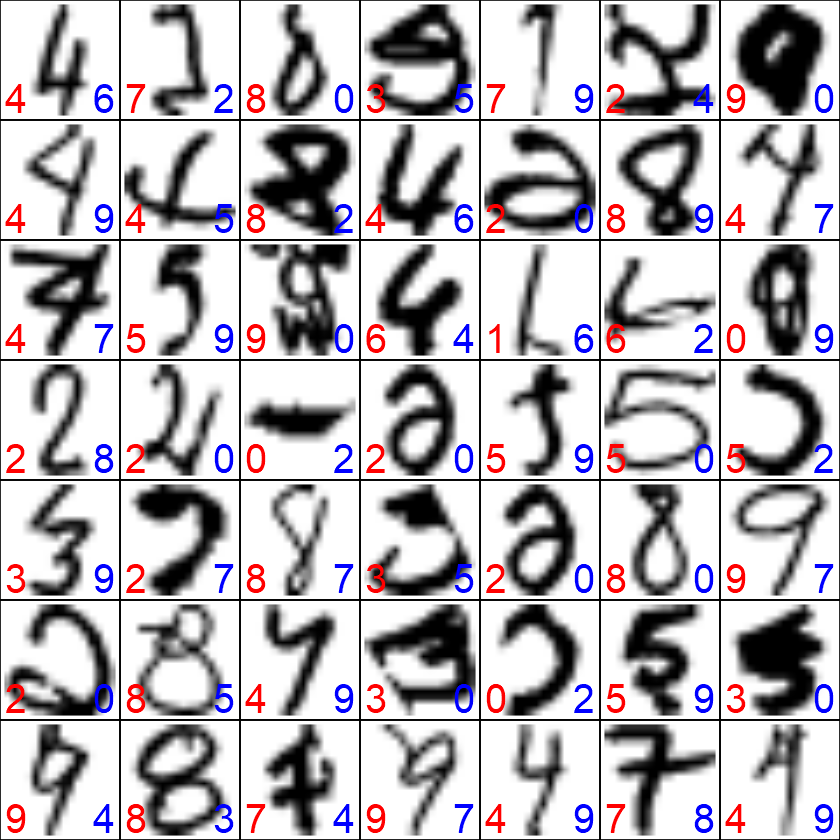

In [66]:
iset <- sample(which(predKnn != ytest),7*7)
par(mar=c(0,0,0,0))
par(mfrow=c(7,7))
for (j in iset) {
  y <- matrix(as.matrix(test[j,-1]),16,16,byrow=TRUE)
  y <- 1 - (y + 1)*0.5

  plot(0,0,xlab="",ylab="",axes=FALSE)
  rasterImage(y,-1,-1,1,1)
  box()
  text(-0.8,-0.7, test[j,1], cex=3, col="red")
  text(0.8,-0.7, predKnn[j], cex=3, col="blue")
}